<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18449 entries, 0 to 18448
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   timestamp        18449 non-null  datetime64[ns]
 1   casing_pressure  18449 non-null  float64       
 2   ANOMALY          18449 non-null  int64         
 3   anomaly_percent  18449 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 576.7 KB
Rows  :  18449
Columns  :  4

Features  :
 ['timestamp', 'casing_pressure', 'ANOMALY', 'anomaly_percent']

Missing Values :
 timestamp          False
casing_pressure    False
ANOMALY            False
anomaly_percent    False
dtype: bool

 Unique Values :
 timestamp          18403
casing_pressure    11341
ANOMALY                2
anomaly_percent    11341
dtype: int64

Sensor Error:  62


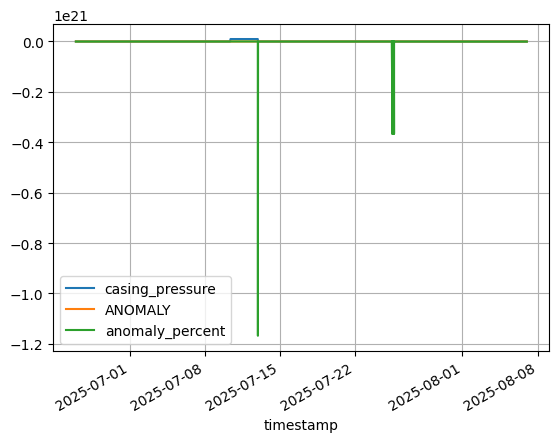

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# load Data
#df = pd.read_csv("dataset/Casing_pressure-anomaly-csv.csv")
df = pd.read_csv("dataset/2sd-casing-pressure.csv")

df = df.rename(columns={
    "t_stamp": "timestamp",
    "Well Pads/Pronghorn KO/12HNB/Well Head/Well Casing Pressure/Value" : "casing_pressure"
})

# convert timestamp
df["timestamp"] = pd.to_datetime(df["timestamp"])

df_non_index = df

#df.to_csv("timestamp-corrected.csv")
df['anomaly_percent'] = ((df['casing_pressure'] - df['casing_pressure'].std()) / df['casing_pressure']) * 100


df.info()


print("Rows  : ", df.shape[0])
print("Columns  : ", df.shape[1])
print("\nFeatures  :\n", df.columns.to_list())
print("\nMissing Values :\n", df.isnull().any())
print("\n Unique Values :\n", df.nunique())

# Set index for time-series ops
df = df.set_index("timestamp").sort_index()
#df.head()

df.loc['2025-07-01':'2025-07-31']
df.plot(grid=True)

max_valid_pressure = 300

df_non_index['sensor_malfunction'] = df_non_index['casing_pressure'] > max_valid_pressure

print("\nSensor Error: ", df_non_index['sensor_malfunction'].sum())

df_non_index.head()
df_non_index.describe()

df_clean = df_non_index[~df_non_index["sensor_malfunction"]].copy()

import plotly.express as px

fig = px.line(df_clean, x='Timestamp', y='Casing Pressure', title='Casing Pressure')
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label='1m', step='minute', stepmode='backward'),
            dict(count=1, label='1D', step='day', stepmode='backward'),
            dict(count=1, label='1M', step='month', stepmode='backward'),
            dict(step='all')
        ])
    )
)

fig.show()